# Лабораторная работа #4
Вариант #1

Искендеров А.С.

[Временная ссылка на загрузку таблицы](https://upload.disroot.org/r/eU2PAuUz#nN5Bju2WgGy7jiwDE6gR3YvDUyYgNDqscVwnBPW38EA=)

[Ссылка на набор данных в Kaggle](https://www.kaggle.com/datasets/zaheenhamidani/ultimate-spotify-tracks-db)

In [124]:
%pip install pandas
%pip install numpy
%pip install scikit-learn
%pip install matplotlib
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [125]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.utils import resample
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [126]:
df = pd.read_csv('SpotifyFeatures.csv')
df.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


Удалим повторяющиеся и пустые строки.

In [127]:
print(df.size)
df = df.dropna().drop_duplicates()
print(df.size)

4189050
4189032


Удалим ненужные нам столбцы и закодируем текстовые значения числами.

In [128]:
df = df.drop(columns=['genre', 'artist_name', 'track_name', 'track_id'])

df["key"] = pd.factorize(df["key"])[0]
df["mode"] = pd.factorize(df["mode"])[0]
df["time_signature"] = pd.factorize(df["time_signature"])[0]

df.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,0,0.611,0.389,99373,0.910,0.000,0,0.3460,-1.828,0,0.0525,166.969,0,0.814
1,1,0.246,0.590,137373,0.737,0.000,1,0.1510,-5.559,1,0.0868,174.003,0,0.816
2,3,0.952,0.663,170267,0.131,0.000,2,0.1030,-13.879,1,0.0362,99.488,1,0.368
3,0,0.703,0.240,152427,0.326,0.000,0,0.0985,-12.178,0,0.0395,171.758,0,0.227
4,4,0.950,0.331,82625,0.225,0.123,3,0.2020,-21.150,0,0.0456,140.576,0,0.390


Посмотрим то, насколько столбцы зависят друг от друга. 

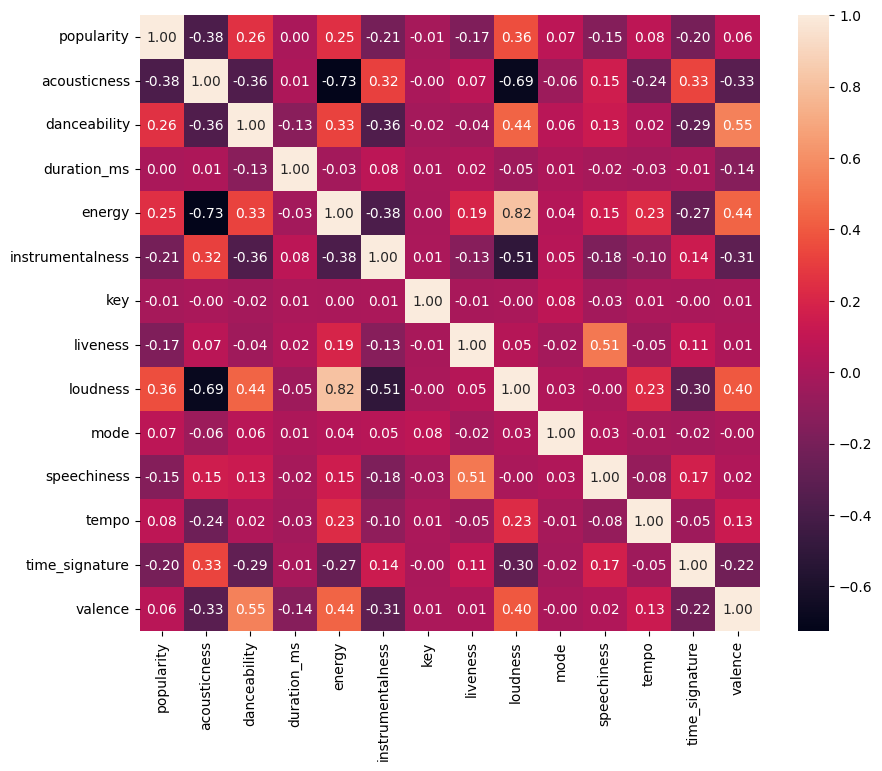

In [129]:
plt.figure(figsize=(10, 8))
sns.heatmap(
    df.corr(),
    annot=True,
    fmt=".2f"
)
plt.show()

Мастштабируем все столбцы таблицы.

In [130]:
df = StandardScaler().fit_transform(df)
df

array([[-2.26100114,  0.68337202, -0.89094303, ...,  1.5956084 ,
        -0.38475749,  1.38074198],
       [-2.20602572, -0.3454714 ,  0.19198794, ...,  1.82325422,
        -0.38475749,  1.38843239],
       [-2.09607488,  1.64456546,  0.58529123, ..., -0.5883222 ,
         1.07558406, -0.33422014],
       ...,
       [ 0.32284371,  1.50080926, -0.20131535, ..., -1.08520111,
        -0.38475749,  1.37689677],
       [ 0.15791745, -0.30037141,  1.02708396, ..., -0.57074874,
        -0.38475749,  0.13104985],
       [-0.33686136, -0.76461938,  1.09712428, ..., -0.12199455,
        -0.38475749,  0.09259779]])

Наконец, можем провести кластеризацию данных. Проводить её будем с 
количеством кластеров от 2 до 11 включительно.

In [131]:
inertia = []
silhouette_scores = []
labels_history = {}

k_range = range(2, 12)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)

    labels = kmeans.fit_predict(df)

    inertia.append(kmeans.inertia_)

    sampled_data = resample(df, n_samples=10000, random_state=42)
    sampled_labels = kmeans.fit_predict(sampled_data)
    labels_history[k] = sampled_labels
    silhouette_scores.append(silhouette_score(sampled_data, sampled_labels))

Определим оптимальное количество кластеров с помощью метода локтя и 
силуэтного анализа.

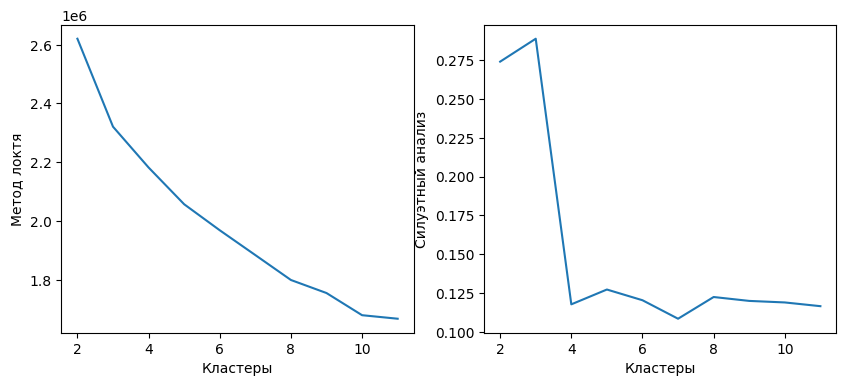

In [132]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

ax[0].plot(k_range, inertia)
ax[0].set_xlabel("Кластеры")
ax[0].set_ylabel("Метод локтя")

ax[1].plot(k_range, silhouette_scores)
ax[1].set_xlabel("Кластеры")
ax[1].set_ylabel("Силуэтный анализ")

plt.show()

Кажется, метод локтя показывает, что лучше всего себя показали 3 
кластера. Силуэтный анализ подтверждает эту теорию.

Выделим 2 основных столбца с помощью метода снижения размерности PCA 
(Principal Component Analysis), чтобы показать работу кластеризации на 
двумерном графике.

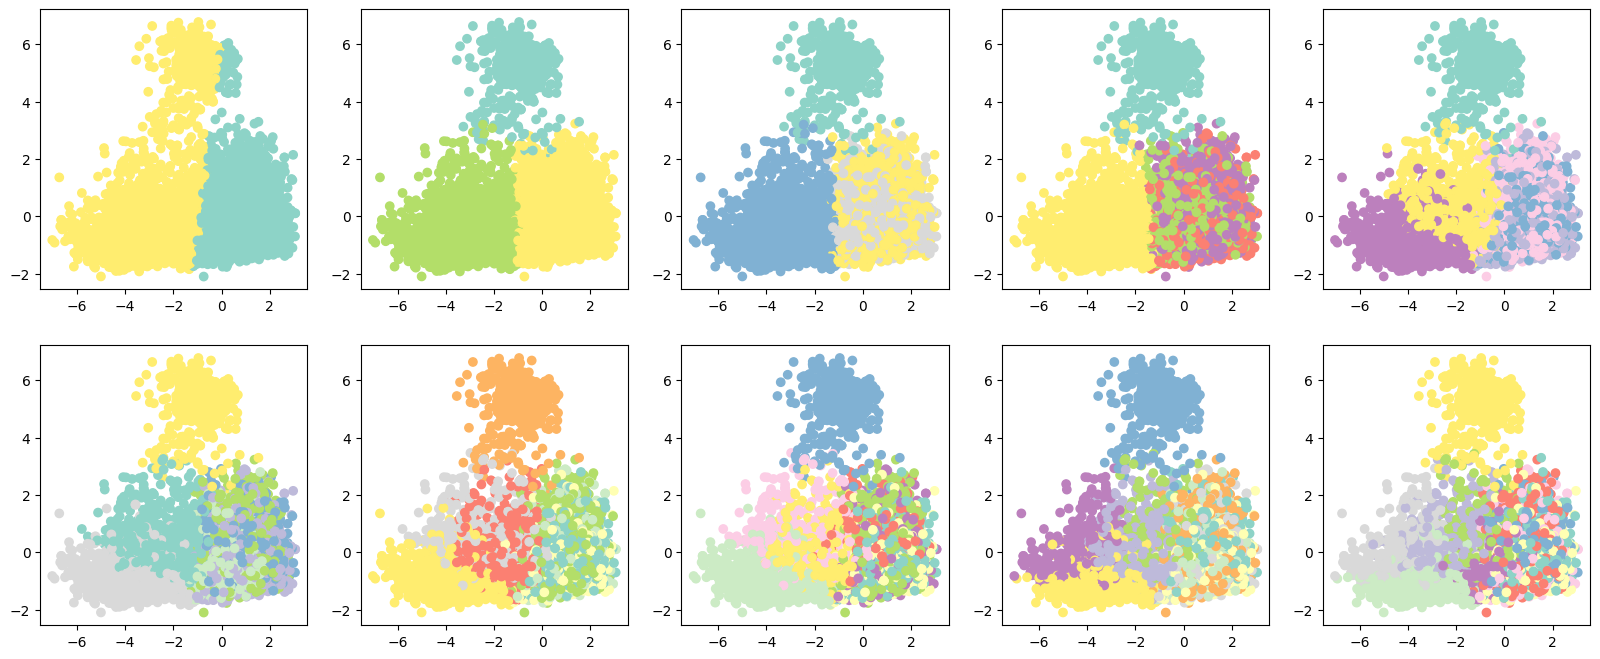

In [133]:
pca = PCA(n_components=2)
reduced = pca.fit_transform(df)

fig, ax = plt.subplots(2, 5, figsize=(20, 8))

for k in k_range:
    sampled_data = resample(reduced, n_samples=10000, random_state=42)
    x = (k - 2) // 5
    y = (k - 2) - (x * 5)
    ax[x][y].scatter(sampled_data[:, 0], sampled_data[:, 1], c=labels_history[k], cmap="Set3")

plt.show()